<a href="https://colab.research.google.com/github/archika08/Accident-Detection/blob/main/ACCIDENT_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
  

In [14]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [15]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/BTP/btpnew/data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 773 files belonging to 2 classes.


In [16]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
     '/content/drive/My Drive/BTP/btpnew/data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)


Found 98 files belonging to 2 classes.


In [17]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/BTP/btpnew/data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)



Found 100 files belonging to 2 classes.


In [18]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= validation_ds, epochs = 10)

Epoch 1/10
8/8 [==============================] - 154s 19s/step - loss: 5.5074 - accuracy: 0.5563 - val_loss: 1.2664 - val_accuracy: 0.5306
Epoch 2/10
8/8 [==============================] - 110s 13s/step - loss: 0.6773 - accuracy: 0.5653 - val_loss: 0.9002 - val_accuracy: 0.5204
Epoch 3/10
8/8 [==============================] - 109s 14s/step - loss: 0.6029 - accuracy: 0.6766 - val_loss: 1.8144 - val_accuracy: 0.5408
Epoch 4/10
8/8 [==============================] - 109s 14s/step - loss: 0.5190 - accuracy: 0.7348 - val_loss: 0.5814 - val_accuracy: 0.7653
Epoch 5/10
8/8 [==============================] - 109s 13s/step - loss: 0.4401 - accuracy: 0.7982 - val_loss: 0.4777 - val_accuracy: 0.8163
Epoch 6/10
8/8 [==============================] - 114s 14s/step - loss: 0.3666 - accuracy: 0.8396 - val_loss: 0.6215 - val_accuracy: 0.7857
Epoch 7/10
8/8 [==============================] - 109s 14s/step - loss: 0.3048 - accuracy: 0.8616 - val_loss: 0.5834 - val_accuracy: 0.8265
Epoch 8/10
8/8 [====

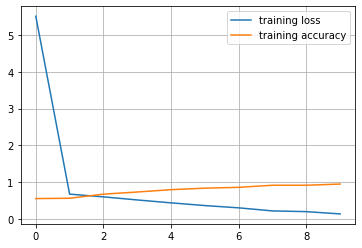

In [20]:
## stats on training data
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

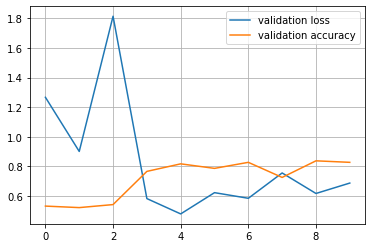

In [21]:
## stats on validation data
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [23]:
MyCnn.save('Model.h5')

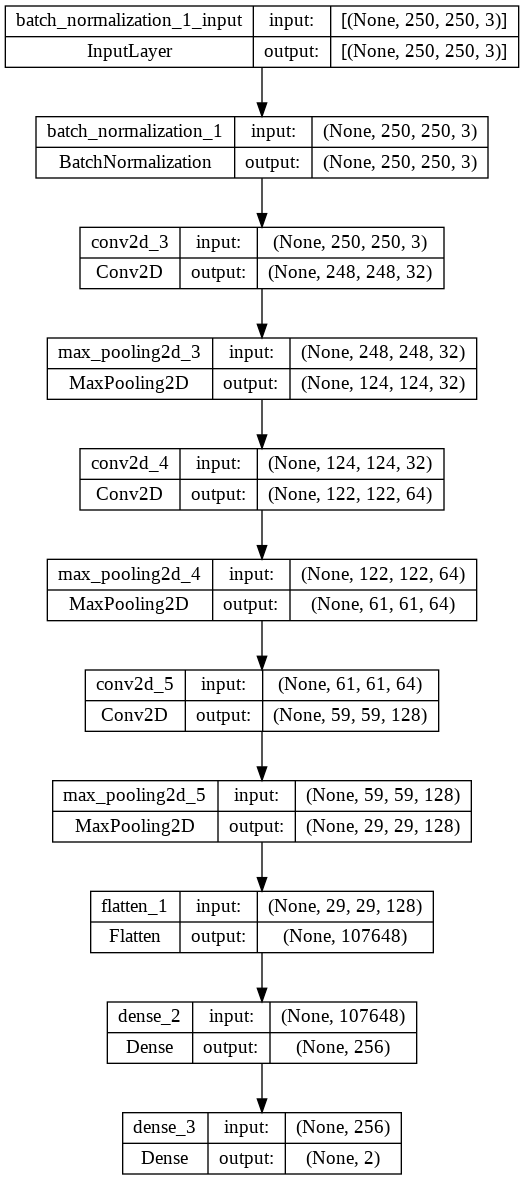

In [24]:
from keras.utils.vis_utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

4/4 [==============================] - 4s 773ms/step


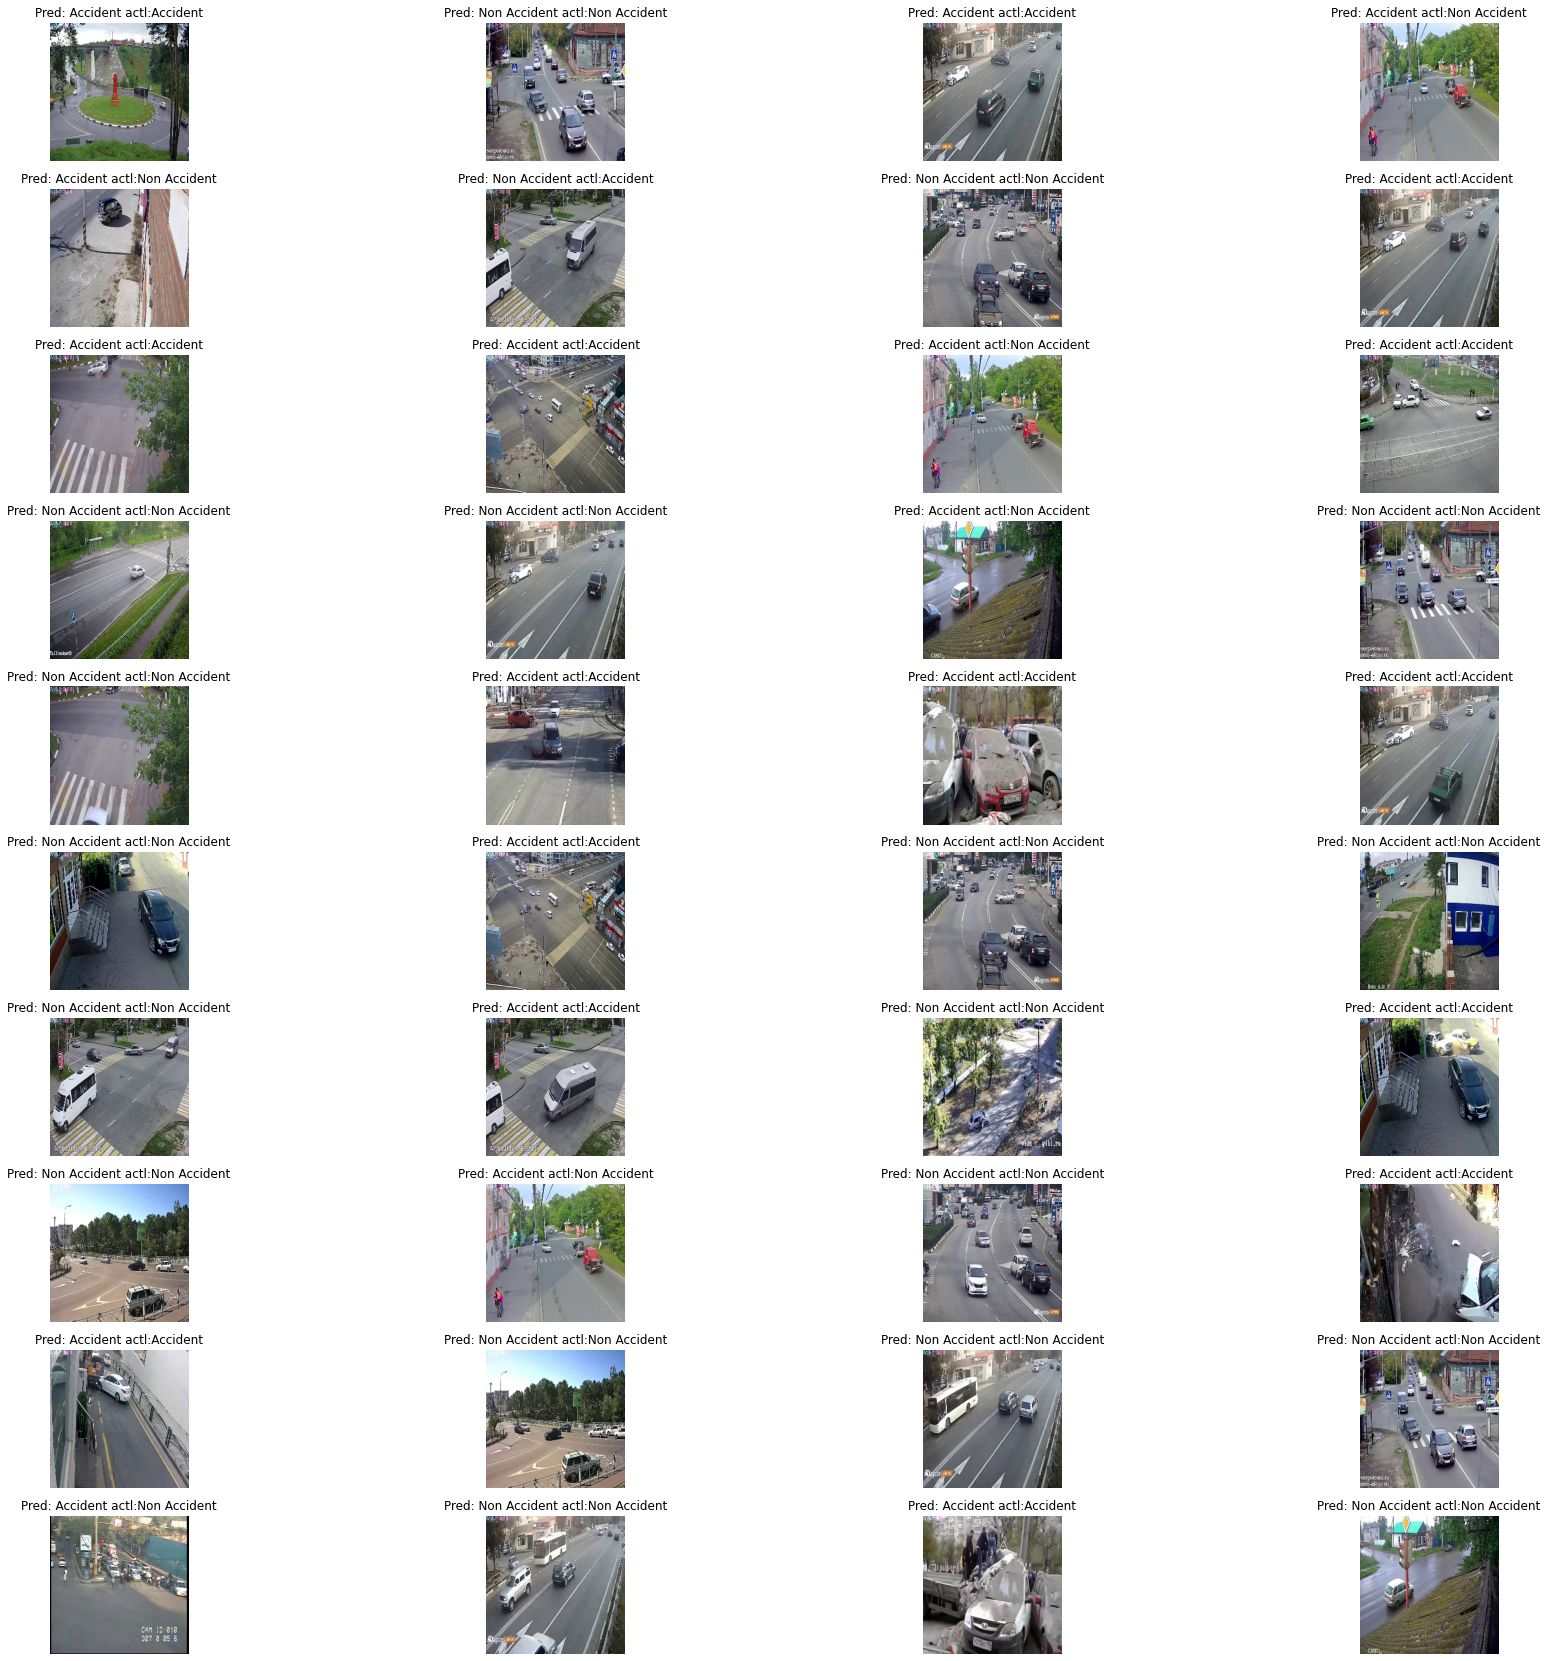

In [68]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
y_true = []
y_pred=[]
l=[]
m=[]
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    l= prdlbl
    m.append(labels)
    # print(prdlbl)
    # print()
    # print(labels)
    # print()
    
    AccuracyVector = np.array(prdlbl) == labels

    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [54]:
y_true =np.array(m)
y_true = np.reshape(y_true, [100,])

In [49]:
y_pred =np.array(l)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf_matrix=confusion_matrix(y_true, y_pred)
accuracy_score(y_true, y_pred)

0.82

In [65]:
cf_matrix

array([[41,  6],
       [12, 41]])

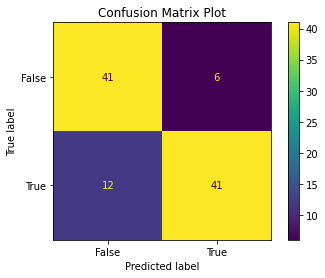

In [78]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix Plot')
plt.show()

In [25]:
AccuracyVector

<tf.Tensor: shape=(100,), dtype=bool, numpy=
array([ True,  True,  True, False, False, False,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True])>

In [26]:
cnt=0
for i in range(len(AccuracyVector)):
  if(AccuracyVector[i]==True):
    cnt=cnt+1
print(cnt)

82


In [69]:
from keras.models import model_from_json
import numpy as np

class AccidentDetectionModel(object):

    class_nums = ['Accident', "No Accident"]

    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model.make_predict_function()

    def predict_accident(self, img):
        self.preds = self.loaded_model.predict(img)
        return AccidentDetectionModel.class_nums[np.argmax(self.preds)], self.preds

In [79]:
model_json = MyCnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [81]:
import cv2
from google.colab.patches import cv2_imshow
# from detection import AccidentDetectionModel
import numpy as np
import os
model = AccidentDetectionModel("/content/drive/MyDrive/BTP/btpnew/model.json", '/content/drive/MyDrive/BTP/btpnew/Model.h5')
font = cv2.FONT_HERSHEY_SIMPLEX

def startapplication():
  video = cv2.VideoCapture("/content/drive/MyDrive/BTP/btpnew/6mVcTFd5TzI.mp4") # for camera use video = cv2.VideoCapture(0)

  if (video.isOpened()== False): 
    print("Error opening video stream or file")
  # Default resolutions of the frame are obtained.The default resolutions are system dependent.
  # We convert the resolutions from float to integer.
  frame_width = int(video.get(3))
  frame_height = int(video.get(4))

  # Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
  out = cv2.VideoWriter('outpy.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
  count = 0
  while video.isOpened():
    ret, frame = video.read()
    if ret == True:
      gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      roi = cv2.resize(gray_frame, (250, 250))

      pred, prob = model.predict_accident(roi[np.newaxis, :, :])
      if(pred == "Accident"):
        prob = (round(prob[0][0]*100, 2))

      # to beep when alert:
      # if(prob > 90):
      #     os.system("say beep")

        cv2.rectangle(frame, (0, 0), (280, 40), (0, 0, 0), -1)
        cv2.putText(frame, pred+" "+str(prob), (20, 30), font, 1, (255, 255, 0), 2)
        out.write(frame)
        count = count + 1
      if cv2.waitKey(33) & 0xFF == ord('q'):
        return
  # cv2_imshow(frame) 
      
    else:
      break
  print(count)

if __name__ == '__main__':
    startapplication()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 92ms/step
1944
